In [1]:
import numpy as np
import pandas as pd
from scripts.drosophila import depth_first_search

In [2]:
conn_m=np.load('/media/maria/DATA1/Documents/NeuralData/conn_dir_drosophila.npy')[:1000,:1000]

In [3]:
n_nodes=1000
visited_arr=np.zeros((n_nodes,))
visited_arr=depth_first_search(conn_m,0,visited_arr)


In [4]:
print(visited_arr)

[1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [5]:
conn_connected=conn_m[visited_arr!=0]
conn_connected=conn_connected[:,visited_arr!=0]
print(conn_connected.shape)

(919, 919)


In [6]:
from brian2 import *
N = conn_connected.shape[0]
tau = 10*ms
vr = -70*mV
vt = -40*mV
eqs = '''
dv/dt = (-v+I)/tau : volt
I: volt
'''
@network_operation(dt=10*ms)
def update_I():
    I=np.random.normal(0,1,919)
    I[I<0]=0
    G.I=I*mV
    
w = 0.1*mV
G = NeuronGroup(N, eqs, threshold='v>vt', reset='v=vr')
S = Synapses(G, G, model='w : volt', on_pre='v += w')
for i in range(0, conn_connected.shape[0]):
    for j in range(0,conn_connected.shape[1]):
        if conn_connected[i,j]!=0:
            S.connect(i=i, j=j)

INFO       Cache size for target "cython": 1472 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/maria/.cython/brian_extensions" directory. [brian2]


In [7]:
monitors = [SpikeMonitor(G), StateMonitor(G, 'v', record=True)]

# a simple run would not include the monitors
net = Network(collect())  # automatically include G and S
net.add(monitors)  # manually add the monitors

net.run(1000*ms)

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.31s). [brian2.stateupdaters.base.method_choice]
WARNING    "w" is an internal variable of group "synapses", but also exists in the run namespace with the value 100. * uvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


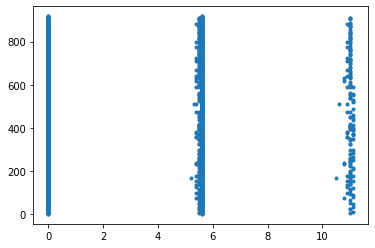

In [19]:
plot(monitors[0].t[:2000]/ms, monitors[0].i[:2000], '.')

ValueError: x and y must have same first dimension, but have shapes (10000,) and (1, 10000)

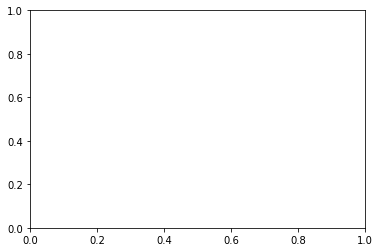

In [9]:
plot(monitors[1].t / ms, monitors[1][G[0]].v )

In [ ]:
import seaborn as sns
sns.heatmap(conn_connected)